# PRACTICA 6 - DISEÑO DE FILTROS DIGITALES
#### David Alejandro Henao , Maria Camila Bravo E 

In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter

### 1. Creación de señal 

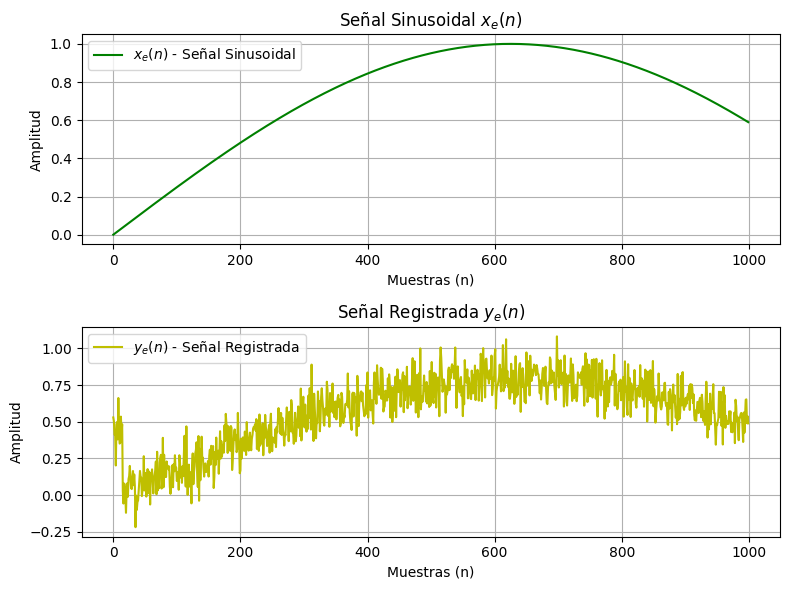

In [2]:
#PARAMETROS
F_0 = 0.01  #Frecuencia Inicial en HZ 
F_s = 25   #Frecuencia en HZ 
N = 1000    
D = 15     #Numero de muestras 
alpha = 0.8 
sigma_squared = 0.01  #Varianza

# Generación del tiempo
n = np.arange(N)
t = n / F_s

# Generación de la señal sinusoidal x_e(n)
x_e = np.sin(2 * np.pi * F_0 * t)

# Generación del ruido gaussiano w(n)
w = np.random.normal(0, np.sqrt(sigma_squared), N)

# Generación de la señal registrada y_e(n)
y_e = alpha * np.roll(x_e, D) + w  # Se aplica el retraso y se añade el ruido

# Gráfica de las señales
plt.figure(figsize=(8, 6))

# Gráfico de la señal original x_e(n)
plt.subplot(2, 1, 1)
plt.plot(n, x_e, label='$x_e(n)$ - Señal Sinusoidal', color='green')
plt.title('Señal Sinusoidal $x_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Gráfico de la señal registrada y_e(n)
plt.subplot(2, 1, 2)
plt.plot(n, y_e, label='$y_e(n)$ - Señal Registrada', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()


### 2. Diseño de un Filtro 

####  1. FILTRO FIR

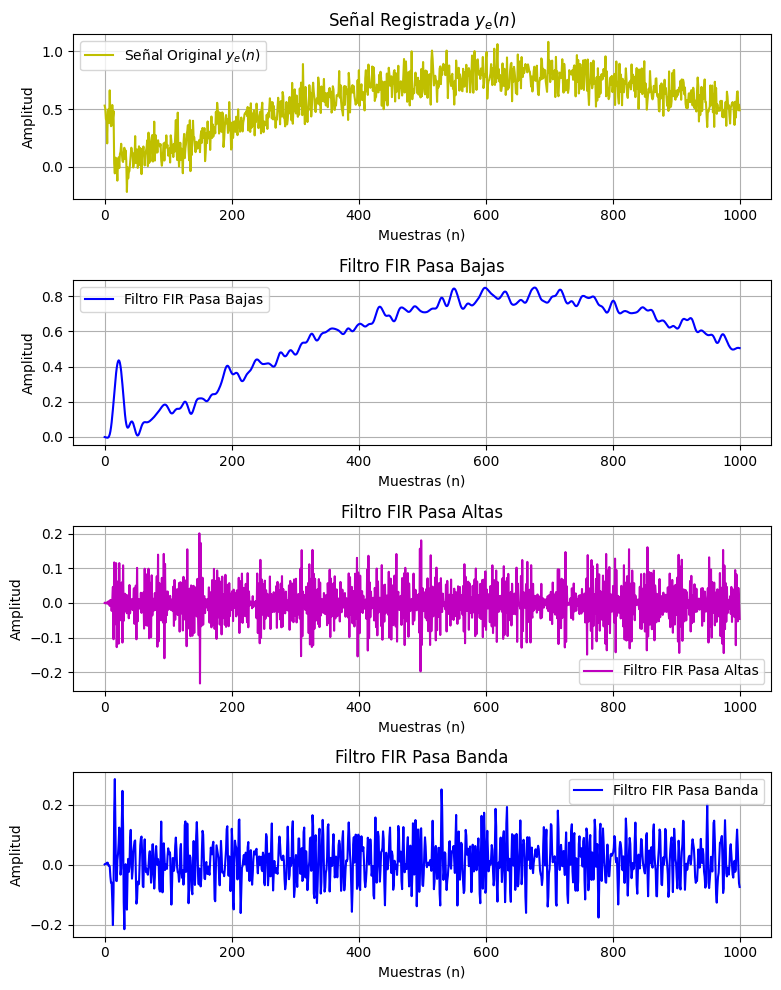

In [3]:
# Frecuencias de corte normalizadas
cutoff_low = 1.25 / (F_s / 2)  # Pasa bajas (1.25 muestras/s)
cutoff_high = 7.5 / (F_s / 2)   # Pasa altas (7.5 muestras/s)
order = 30                     # Orden del filtro

# --- Diseño de filtros FIR ---

# Filtro pasa bajas
b_low = firwin(order + 1, cutoff_low)
y_e_fir_low = lfilter(b_low, 1.0, y_e)

# Filtro pasa altas
b_high = firwin(order + 1, cutoff_high, pass_zero=False)
y_e_fir_high = lfilter(b_high, 1.0, y_e)

# Filtro pasa banda (entre 1.25 y 7.5 muestras/s)
b_band = firwin(order + 1, [cutoff_low, cutoff_high], pass_zero=False)
y_e_fir_band = lfilter(b_band, 1.0, y_e)

# --- Gráficas de resultados ---
plt.figure(figsize=(8, 10))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_fir_low, label='Filtro FIR Pasa Bajas', color='blue')
plt.title('Filtro FIR Pasa Bajas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_fir_high, label='Filtro FIR Pasa Altas', color='m')
plt.title('Filtro FIR Pasa Altas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_fir_band, label='Filtro FIR Pasa Banda', color='b')
plt.title('Filtro FIR Pasa Banda')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar gráficas
plt.tight_layout()
plt.show()


•	¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

#### 2. FILTRO IIR

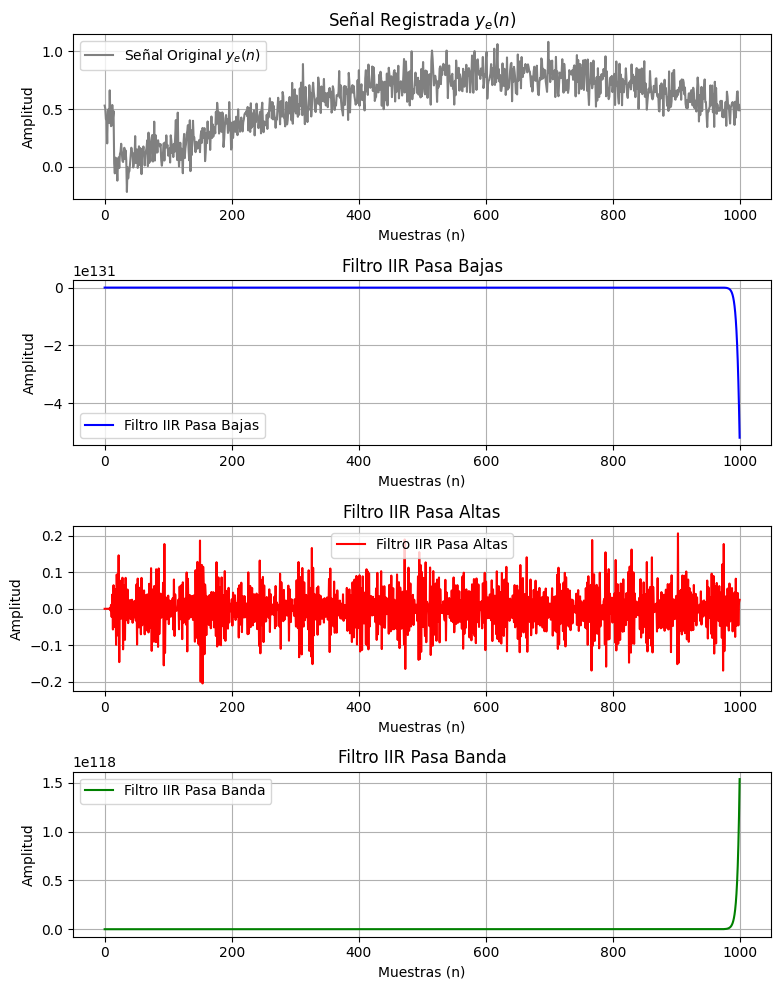

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Parámetros
F_s = 25  # Frecuencia de muestreo (Hz)
order = 30  # Orden del filtro
cutoff_low = 1.25  # Frecuencia de corte baja (Hz)
cutoff_high = 7.5  # Frecuencia de corte alta (Hz)

# Función para diseñar un filtro IIR Butterworth
def butter_filter(cutoff, fs, order=5, btype='low'):
    nyq = 0.5 * fs
    if isinstance(cutoff, list):
        normal_cutoff = [c / nyq for c in cutoff]
    else:
        normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

# Diseñar filtros IIR
b_iir_low, a_iir_low = butter_filter(cutoff_low, F_s, order, btype='low')  # Pasa bajas
b_iir_high, a_iir_high = butter_filter(cutoff_high, F_s, order, btype='high')  # Pasa altas
b_iir_band, a_iir_band = butter_filter([cutoff_low, cutoff_high], F_s, order, btype='band')  # Pasa banda

# Aplicar el filtro a la señal (asumiendo que ya tienes y_e)
# Nota: Asegúrate de tener la señal 'y_e' definida antes de aplicar el filtro
y_e_iir_low = lfilter(b_iir_low, a_iir_low, y_e)
y_e_iir_high = lfilter(b_iir_high, a_iir_high, y_e)
y_e_iir_band = lfilter(b_iir_band, a_iir_band, y_e)


plt.figure(figsize=(8, 10))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_iir_low, label='Filtro IIR Pasa Bajas', color='blue')
plt.title('Filtro IIR Pasa Bajas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_iir_high, label='Filtro IIR Pasa Altas', color='red')
plt.title('Filtro IIR Pasa Altas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_iir_band, label='Filtro IIR Pasa Banda', color='green')
plt.title('Filtro IIR Pasa Banda')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar gráficas
plt.tight_layout()
plt.show()

### 3. Filtrado 
 

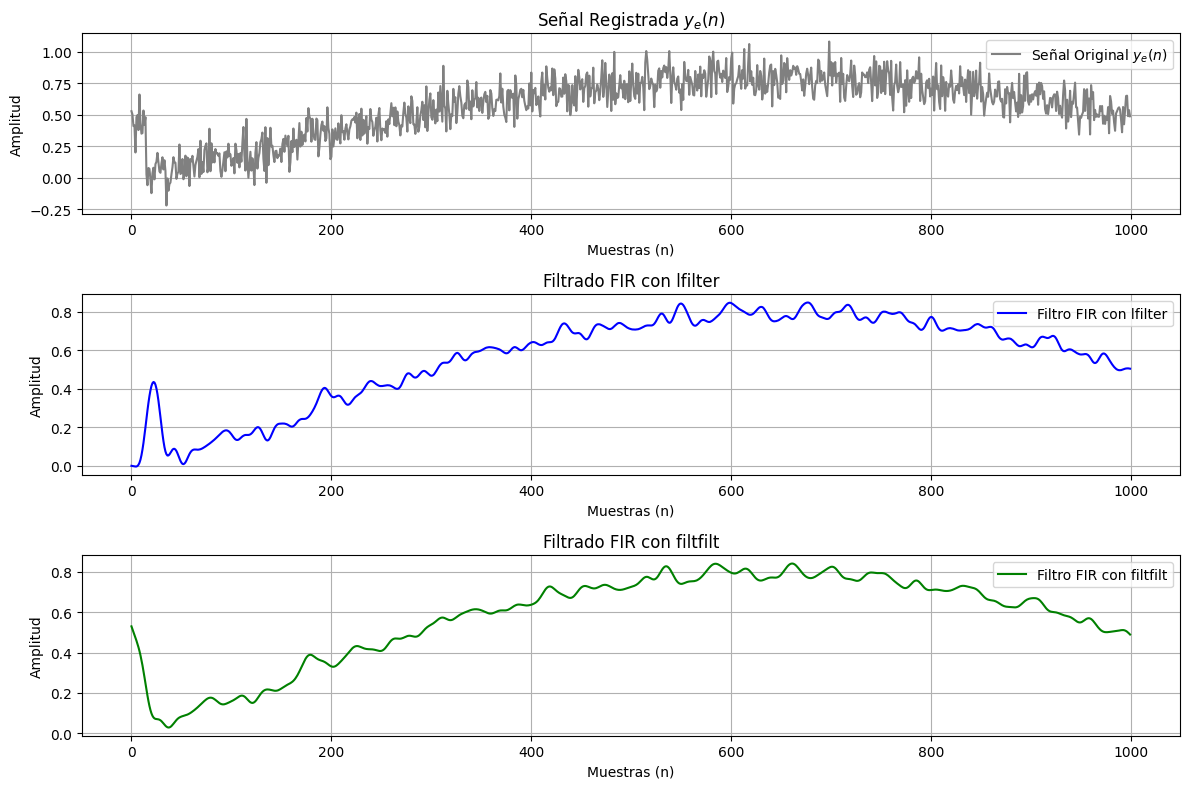

In [5]:
# Filtrado FIR usando lfilter
y_e_fir_low_lfilter = lfilter(b_low, 1.0, y_e)

# Filtrado FIR usando filtfilt
y_e_fir_low_filtfilt = signal.filtfilt(b_low, 1.0, y_e)

# Gráficas para FIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_fir_low_lfilter, label='Filtro FIR con lfilter', color='blue')
plt.title('Filtrado FIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_fir_low_filtfilt, label='Filtro FIR con filtfilt', color='green')
plt.title('Filtrado FIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

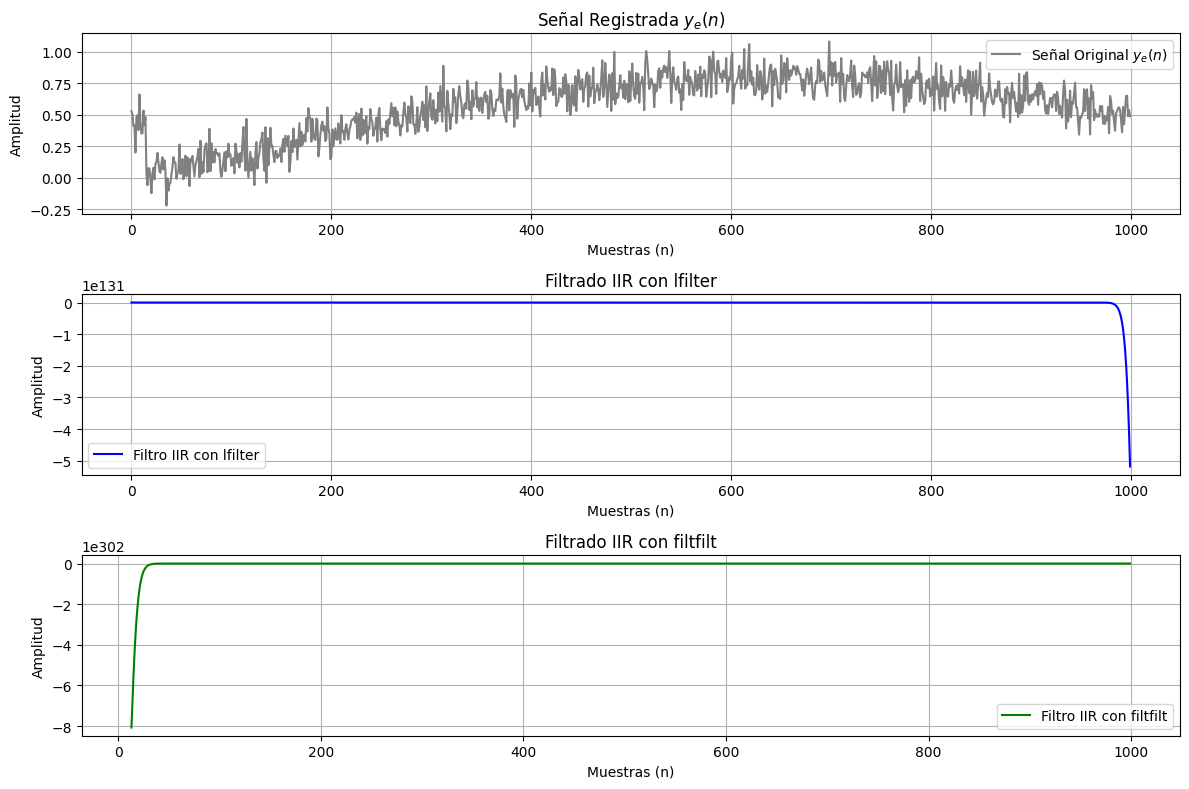

In [6]:
# Filtrado IIR usando lfilter
y_e_iir_low_lfilter = lfilter(b_iir_low, a_iir_low, y_e)

# Filtrado IIR usando filtfilt
y_e_iir_low_filtfilt = signal.filtfilt(b_iir_low, a_iir_low, y_e)

# Gráficas para el filtro IIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_iir_low_lfilter, label='Filtro IIR con lfilter', color='blue')
plt.title('Filtrado IIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_iir_low_filtfilt, label='Filtro IIR con filtfilt', color='green')
plt.title('Filtrado IIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. 

### 4. APLICACIÓN

### Conclusiones  

#### REFERENCIAS